# P3 - Movie Genre Classification

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

### Objective

Classify a movie genre based on its plot.
Source: https://www.kaggle.com/c/miia4201-202019-p3-moviegenreclassification/overview

Input: movie plot
Output: Probability of the movie belong to each genre

### Evaluation

- 20% API
- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 50% Performance in the Kaggle competition (The grade for each group will be proportional to the ranking it occupies in the competition. The group in the first place will obtain 5 points, for each position below, 0.25 points will be subtracted, that is: first place: 5 points, second: 4.75 points, third place: 4.50 points ... eleventh place: 2.50 points, twelfth place: 2.25 points).

• The project must be carried out in the groups assigned for module 4.
• Use clear and rigorous procedures.
• The delivery of the project is on July 12, 2020, 11:59 pm, through Sicua + (Upload: the API and the report in PDF format).
• No projects will be received after the delivery time or by any other means than the one established. 

### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.
See https://arxiv.org/abs/1702.01992

## Sample Submission

In [93]:
# Librerías

import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')



In [2]:
df_train = pd.read_csv('DataSet/dataTraining.csv', encoding='UTF-8', index_col=0)
df_test = pd.read_csv('Dataset/dataTesting.csv', encoding='UTF-8', index_col=0)

In [3]:
df_train.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
df_train['rating'] = df_train['rating'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    7895 non-null   int64 
 1   title   7895 non-null   object
 2   plot    7895 non-null   object
 3   genres  7895 non-null   object
 4   rating  7895 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 339.2+ KB


In [5]:
df_test.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 1 to 11275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3383 non-null   int64 
 1   title   3383 non-null   object
 2   plot    3383 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.7+ KB


### Limpieza y Normalización

In [7]:
## eliminar caracteres especiales
#spec_chars = ["!",'"',"#","%","&","'","(",")",
#              "*","+",",","-",".","/",":",";","<",
#              "=",">","?","@","[","\\","]","^","_",
#              "`","{","|","}","~","–"]
#cols = df_train.select_dtypes(include=[np.object]).columns
#for char in spec_chars:
#    df_train[cols] = df_train[cols].apply(lambda x: x.str.replace(char, ''))
#    
#cols = df_test.select_dtypes(include=[np.object]).columns
#for char in spec_chars:
#    df_test[cols] = df_test[cols].apply(lambda x: x.str.replace(char, ''))

In [8]:
# eliminar minúsculas
cols = df_train.select_dtypes(include=[np.object]).columns
df_train[cols] = df_train[cols].apply(lambda x: x.str.lower())

cols = df_test.select_dtypes(include=[np.object]).columns
df_test[cols] = df_test[cols].apply(lambda x: x.str.lower())

In [9]:
# eliminar tildes
cols = df_train.select_dtypes(include=[np.object]).columns
df_train[cols] = df_train[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

cols = df_test.select_dtypes(include=[np.object]).columns
df_test[cols] = df_test[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [10]:
df_train.head()

,year,title,plot,genres,rating
3107,2003,most,most is the story of a single father who takes...,"['short', 'drama']",8
900,2008,how to be a serial killer,a serial killer decides to teach the secrets o...,"['comedy', 'crime', 'horror']",5
6724,1941,a woman's face,"in sweden , a female blackmailer with a disfi...","['drama', 'film-noir', 'thriller']",7
4704,1954,executive suite,"in a friday afternoon in new york , the presi...",['drama'],7
2582,1990,narrow margin,"in los angeles , the editor of a publishing h...","['action', 'crime', 'thriller']",6


### Descriptive Analysis

In [11]:
print('year:')
df_train['year'].value_counts()

year:


2013    288
2012    277
2008    268
2009    268
2011    266
       ... 
1894      2
1896      1
1903      1
1910      1
1914      1
Name: year, Length: 106, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


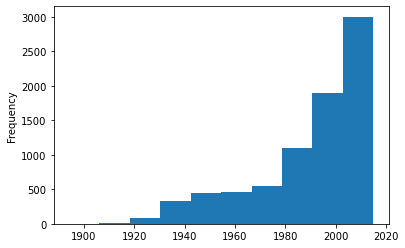

In [12]:
histogram = df_train['year'].plot.hist()
print(histogram)
plt.show()

In [13]:
print('rating:')
df_train['rating'].value_counts()

rating:


6    2851
7    2324
5    1636
4     516
8     349
3     150
2      55
1      11
9       3
Name: rating, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


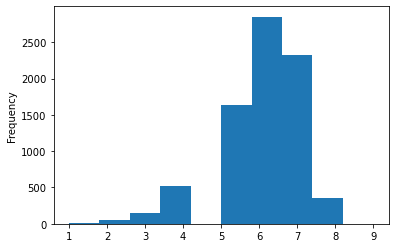

In [14]:
histogram = df_train['rating'].plot.hist()
print(histogram)
plt.show()

### Create count vectorizer


In [15]:
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(df_train['plot'])
X_dtm.shape

(7895, 1000)

In [16]:
print(vect.get_feature_names())

['able', 'about', 'accepts', 'accident', 'accidentally', 'across', 'act', 'action', 'actor', 'actress', 'actually', 'adam', 'adult', 'adventure', 'affair', 'after', 'again', 'against', 'age', 'agent', 'ago', 'agrees', 'air', 'alan', 'alex', 'alice', 'alien', 'alive', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'america', 'american', 'among', 'an', 'and', 'angeles', 'ann', 'anna', 'another', 'any', 'anyone', 'anything', 'apartment', 'appears', 'are', 'area', 'army', 'around', 'arrested', 'arrive', 'arrives', 'art', 'artist', 'as', 'asks', 'assigned', 'assistant', 'at', 'attack', 'attempt', 'attempts', 'attention', 'attracted', 'aunt', 'away', 'baby', 'back', 'bad', 'band', 'bank', 'bar', 'based', 'battle', 'be', 'beautiful', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'begin', 'begins', 'behavior', 'behind', 'being', 'believe', 'believes', 'beloved', 'ben', 'best', 'better', 'between', 'beyond', 'big', 'bill', 'billy', 'birthday', 'black

### Create y

In [17]:
df_train['genres'] = df_train['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(df_train['genres'])


In [18]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [19]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [20]:
X_train

<5289x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 267819 stored elements in Compressed Sparse Row format>

In [21]:
X_test

<2606x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 130363 stored elements in Compressed Sparse Row format>

In [22]:
y_train_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [23]:
y_test_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Train multi-class multi-label model

### Xgboost - Classifier

In [96]:
clf_XGB = OneVsRestClassifier(XGBClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42, verbose = 3))

In [97]:
clf_XGB.fit(X_train, y_train_genres)

[23:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used bu

[23:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used bu

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=10,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, reg_alpha=None,
                                            

In [98]:
y_pred_genres = clf_XGB.predict_proba(X_test)

In [99]:
auc_XGB= roc_auc_score(y_test_genres, y_pred_genres, average='macro')

In [100]:
print('El AUC sin Tunnig es', auc_XGB)

El AUC sin Tunnig es 0.7744838654058905


### Tunnig

In [102]:
xgb = XGBClassifier (njobs = -1, n_estimator =100, random_state =4)

# hiperparameters
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
gamma = [0.5, 0.7, 0.9, 1.0, 1.1, 1.5, 1.9, 2]
min_child_weight = range(1,6,2)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 3, 4] # Minimum number of samples required at each leaf node

parameters = {
                'max_depth': max_depth,
                'gamma':gamma,
                'min_child_weight' : min_child_weight,        
                'min_samples_split': min_samples_split,
                'min_samples_leaf':min_samples_leaf
            }

In [103]:
# tunning model
xgbc = XGBClassifier(n_jobs=-1, n_estimators=100, bootstrap=True, random_state=1234)

# grid for tunning
model_tunning_xgb = GridSearchCV(estimator=xgb, param_grid=parameters, scoring=make_scorer(roc_auc_score), cv=10)

# classifier model
clf = OneVsRestClassifier(estimator=model_tunning_xgb)
clf.fit(X_train, y_train_genres)

[23:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split", "n_estimator", "njobs" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split", "n_estimator", "njobs" } might not be used.

  This may not be accurate due to some paramete

KeyboardInterrupt: 

In [ ]:
print model_tunning_xgb.best_score_
print model_tunning_xgb.best_params_